# Avocado Total Volume Prediction Using Linear Regression

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
Type - conventional or organic
Year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [67]:
#Import python liabraties
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#Set seaborn as default visualization
sns.set()

### Exploratory Data Analysis

In [69]:
#Import csv and show first 5 records
df = pd.read_csv('avocado_prices.csv', sep =';')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015/12/27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015/12/20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015/12/13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015/12/06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015/11/29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [70]:
#Drop unwanted columns in the dataframe
df = df.drop(['Unnamed: 0','year'], axis = 1)

In [71]:
#Convert data to proper format
df['Date'] = pd.to_datetime(df['Date'])

In [72]:
#Shape of the dataframe. 18249 rows and 12 features
df.shape

(18249, 12)

In [73]:
#Features of the dataframe
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region'],
      dtype='object')

In [74]:
#Unique values for feature type
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [75]:
#Unique values for feature region
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [76]:
#Value counts of the type feature
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [77]:
#Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
Date            18249 non-null datetime64[ns]
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
region          18249 non-null object
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 1.7+ MB


In [83]:
#Decriptive statistics of the dataframe
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000


In [84]:
#Summary statistics of type feature
df['type'].describe()

count            18249
unique               2
top       conventional
freq              9126
Name: type, dtype: object

In [85]:
#Summary statistics of reigon feature
df['region'].describe()

count       18249
unique         54
top       Spokane
freq          338
Name: region, dtype: object

In [86]:
#Checking missing values in the dataframe
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
dtype: int64

In [87]:
#Records of a clean dataframe
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


### Data Manipulation

In [88]:
#Sum of average price by region
df_regionsum = df.groupby('region')['AveragePrice'].sum()
df_regionsum.head(10)

region
Albany                 527.63
Atlanta                452.23
BaltimoreWashington    518.57
Boise                  455.67
Boston                 517.44
BuffaloRochester       512.69
California             471.62
Charlotte              542.84
Chicago                526.19
CincinnatiDayton       408.71
Name: AveragePrice, dtype: float64

In [89]:
#Max large bags by type
df_maxbags = df.groupby('type')['Large Bags'].max()
df_maxbags.head()

type
conventional    5719096.61
organic          561530.39
Name: Large Bags, dtype: float64

In [90]:
#Mean, Sum of total volume by date
df_totalvolume_date = df.groupby('Date')['Total Volume'].agg(['mean','sum'])
df_totalvolume_date.head(10)

,mean,sum
Date,,
2015-01-04,7.840216e+05,8.467434e+07
2015-01-11,7.273686e+05,7.855581e+07
2015-01-18,7.258221e+05,7.838878e+07
2015-01-25,7.080211e+05,7.646628e+07
2015-02-01,1.106048e+06,1.194532e+08
2015-02-08,8.025102e+05,8.667111e+07
2015-02-15,7.003441e+05,7.563716e+07
2015-02-22,7.488527e+05,8.087609e+07
2015-03-01,8.281004e+05,8.943484e+07


In [91]:
#Total bags less than 5000
df_lessbags = df[df['Total Bags'] <=5000]
df_lessbags.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
195,2015-03-29,0.98,74543.98,59532.94,7119.52,3101.98,4789.54,4789.54,0.00,0.0,conventional,Boise
196,2015-03-22,1.17,61419.11,44227.33,6589.77,7290.24,3311.77,3311.77,0.00,0.0,conventional,Boise
197,2015-03-15,1.00,65918.28,51472.29,7018.29,2981.80,4445.90,4445.90,0.00,0.0,conventional,Boise
198,2015-03-08,1.14,65350.24,45879.84,7206.22,7403.75,4860.43,4860.43,0.00,0.0,conventional,Boise
202,2015-02-08,1.07,69970.75,54229.34,9647.24,3047.00,3047.17,1373.42,1673.75,0.0,conventional,Boise


In [92]:
#Dataframe with selected regions
df_selected_region = df.loc[df.region.isin(['NewYork', 'Orlando', 'Philadelphia', 'Portland'])]
df_selected_region.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
1456,2015-12-27,1.17,1129876.05,13711.19,872603.60,894.58,242666.68,208470.99,34191.25,4.44,conventional,NewYork
1457,2015-12-20,1.23,1139347.98,13998.35,867406.68,803.83,257139.12,212615.20,44523.92,0.00,conventional,NewYork
1458,2015-12-13,1.12,1254805.29,15990.38,975504.52,1657.92,261652.47,222446.62,39205.85,0.00,conventional,NewYork
1459,2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.00,conventional,NewYork
1460,2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.00,conventional,NewYork


In [93]:
#Transpose of our dataframe
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,18239,18240,18241,18242,18243,18244,18245,18246,18247,18248
Date,2015-12-27 00:00:00,2015-12-20 00:00:00,2015-12-13 00:00:00,2015-12-06 00:00:00,2015-11-29 00:00:00,2015-11-22 00:00:00,2015-11-15 00:00:00,2015-11-08 00:00:00,2015-11-01 00:00:00,2015-10-25 00:00:00,...,2018-03-11 00:00:00,2018-03-04 00:00:00,2018-02-25 00:00:00,2018-02-18 00:00:00,2018-02-11 00:00:00,2018-02-04 00:00:00,2018-01-28 00:00:00,2018-01-21 00:00:00,2018-01-14 00:00:00,2018-01-07 00:00:00
AveragePrice,1.33,1.35,0.93,1.08,1.28,1.26,0.99,0.98,1.02,1.07,...,1.56,1.54,1.57,1.56,1.57,1.63,1.71,1.87,1.93,1.62
Total Volume,64236.6,54877,118220,78992.1,51039.6,55979.8,83453.8,109428,99811.4,74338.8,...,22128.4,17393.3,18421.2,17597.1,15986.2,17074.8,13888,13766.8,16205.2,17489.6
4046,1036.74,674.28,794.7,1132,941.48,1184.27,1368.92,703.75,1022.15,842.4,...,2162.67,1832.24,1974.26,1892.05,1924.28,2046.96,1191.7,1191.92,1527.63,2894.77
4225,54454.8,44638.8,109150,71976.4,43838.4,48068,73672.7,101815,87315.6,64757.4,...,3194.25,1905.57,2482.65,1928.36,1368.32,1529.2,3431.5,2452.79,2981.04,2356.13
4770,48.16,58.33,130.5,72.58,75.78,43.61,93.26,80,85.34,113,...,8.93,0,0,0,0,0,0,727.94,727.01,224.53
Total Bags,8696.87,9505.56,8145.35,5811.16,6183.95,6683.91,8318.86,6829.22,11388.4,8625.92,...,16762.6,13655.5,13964.3,13776.7,12693.6,13498.7,9264.84,9394.11,10969.5,12014.1
Small Bags,8603.62,9408.07,8042.21,5677.4,5986.26,6556.47,8196.81,6266.85,11104.5,8061.47,...,16510.3,13401.9,13698.3,13553.5,12437.4,13066.8,8940.04,9351.8,10919.5,11988.1
Large Bags,93.25,97.49,103.14,133.76,197.69,127.44,122.05,562.37,283.83,564.45,...,252.25,253.56,266.06,223.18,256.22,431.85,324.8,42.31,50,26.01
XLarge Bags,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Visualization Data Analysis

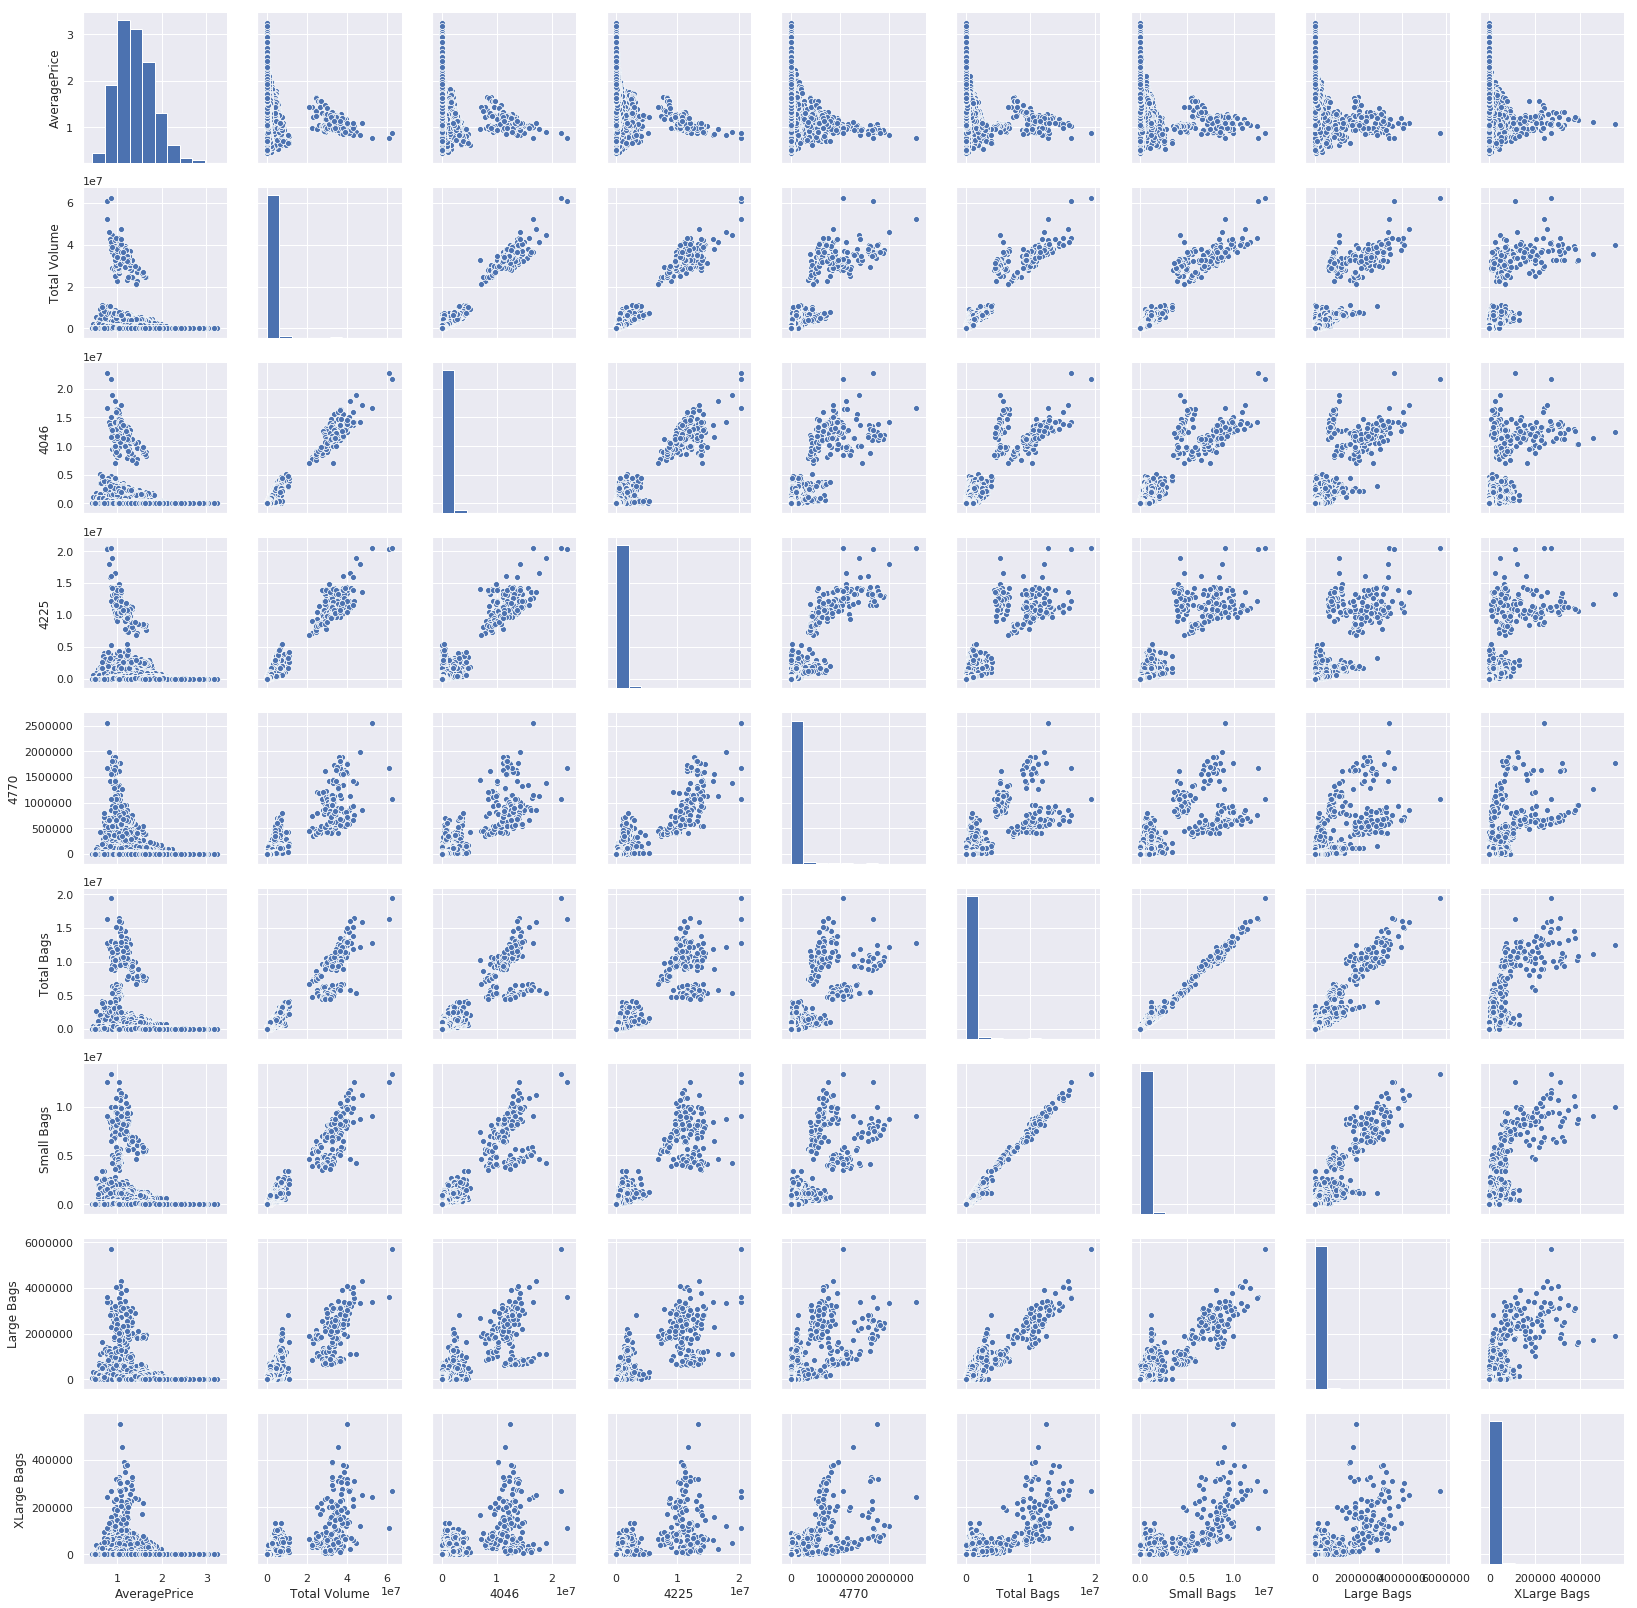

In [94]:
#Pairplot
sns.pairplot(df)

Text(0.5, 1.0, 'Count plot of type')

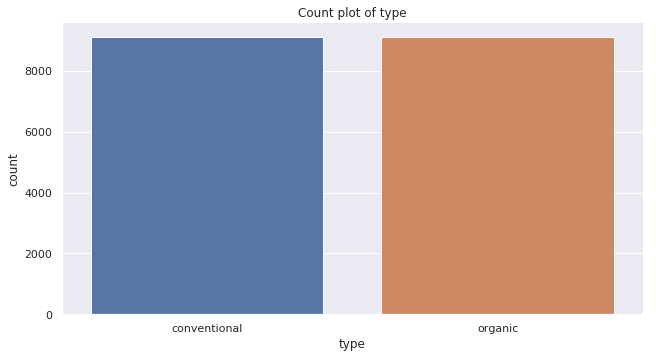

In [97]:
#Countplot
g = sns.catplot(x = 'type', kind = 'count', data = df)
g.fig.set_figwidth(10)
plt.title('Count plot of type')

Text(0.5, 1.0, 'Boxplot of type vs average price')

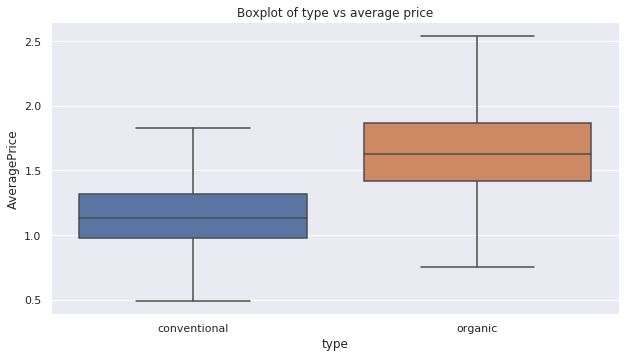

In [99]:
#Boxplot
g = sns.catplot(x = 'type',y = 'AveragePrice', kind = 'box', data = df, sym = "")
g.fig.set_figwidth(10)
plt.title('Boxplot of type vs average price')

Text(0.5, 1.0, 'Line plot of date vs average price')

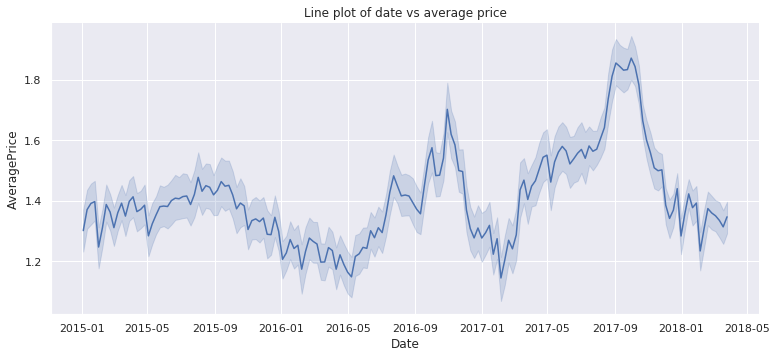

In [104]:
#Lineplot
g = sns.relplot(x = 'Date', y = 'AveragePrice', kind = 'line', data = df)
g.fig.set_figwidth(13)
plt.title('Line plot of date vs average price')

In [86]:
#Correlation for Total volume feature
df.corr()['Total Volume'].sort_values(ascending = False)

Total Volume    1.000000
4046            0.977863
4225            0.974181
Small Bags      0.967238
Total Bags      0.963047
Large Bags      0.880640
4770            0.872202
XLarge Bags     0.747157
AveragePrice   -0.192752
Name: Total Volume, dtype: float64

Text(0.5, 1.0, 'Scatter plot of 4046 vs total volume')

<Figure size 720x360 with 0 Axes>

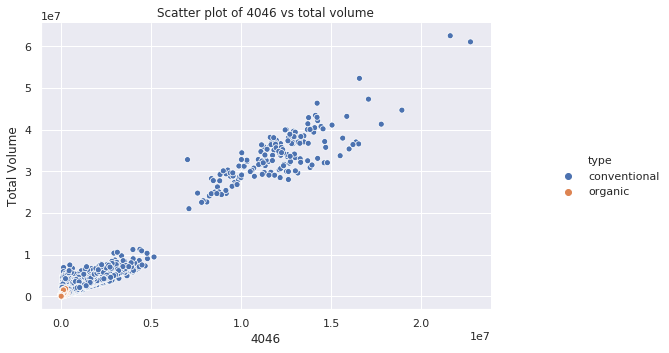

In [105]:
#Scatterplot
plt.figure(figsize=(10,5))
g = sns.relplot(x = '4046', y = 'Total Volume', kind = 'scatter', hue = 'type',data = df)
g.fig.set_figwidth(10)
plt.title('Scatter plot of 4046 vs total volume')

Text(0.5, 1.0, '      Linear regresion plot of 4046 vs total volume')

<Figure size 720x360 with 0 Axes>

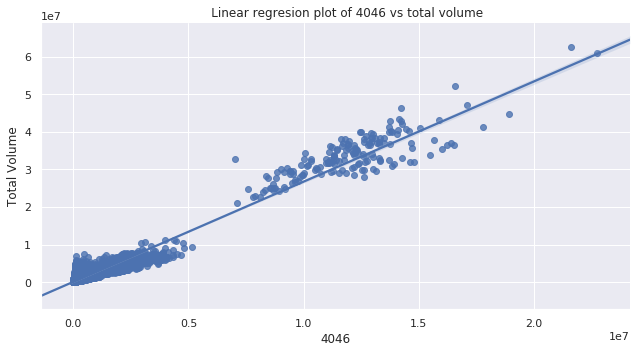

In [107]:
#Linear Regression plot
plt.figure(figsize=(10,5))
g = sns.lmplot(x = '4046', y = 'Total Volume',data = df)
g.fig.set_figwidth(10)
plt.title('      Linear regresion plot of 4046 vs total volume')

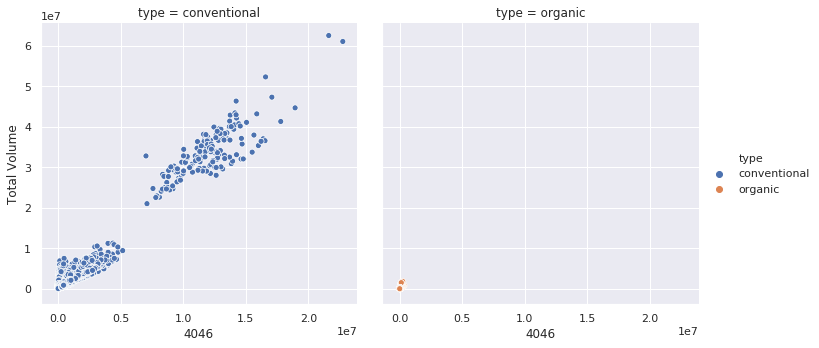

In [108]:
#Scatter plot
sns.relplot(x = '4046', y = 'Total Volume', kind = 'scatter', hue = 'type', col= 'type', data = df)

Text(0, 0.5, 'Frequency')

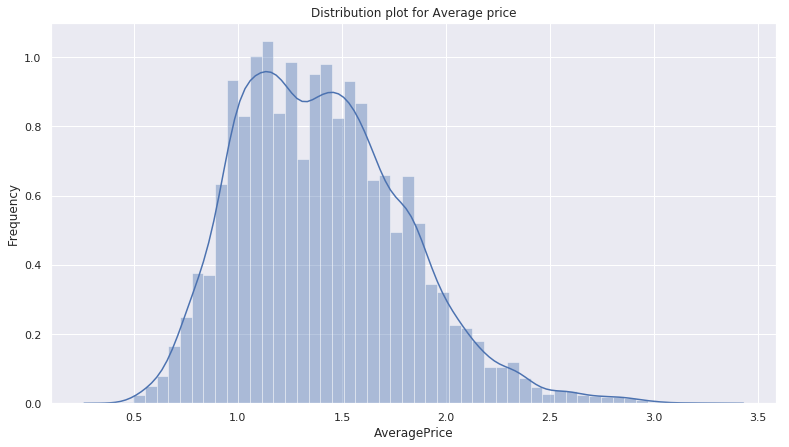

In [111]:
#Distribution plot
plt.figure(figsize=(13,7))
sns.distplot(df['AveragePrice'])
plt.title('Distribution plot for Average price')
plt.ylabel('Frequency')

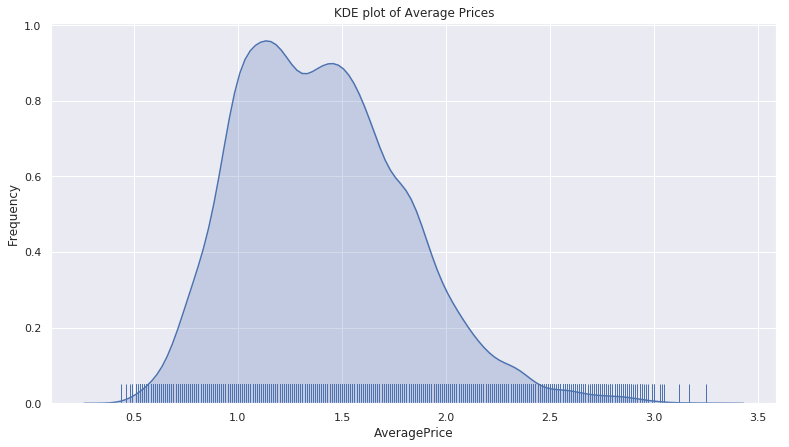

In [112]:
#KDE plot
plt.figure(figsize=(13,7))
sns.distplot(df['AveragePrice'], hist=False, rug=True, kde_kws={'shade':True})
plt.title('KDE plot of Average Prices')
plt.ylabel('Frequency')
plt.show()

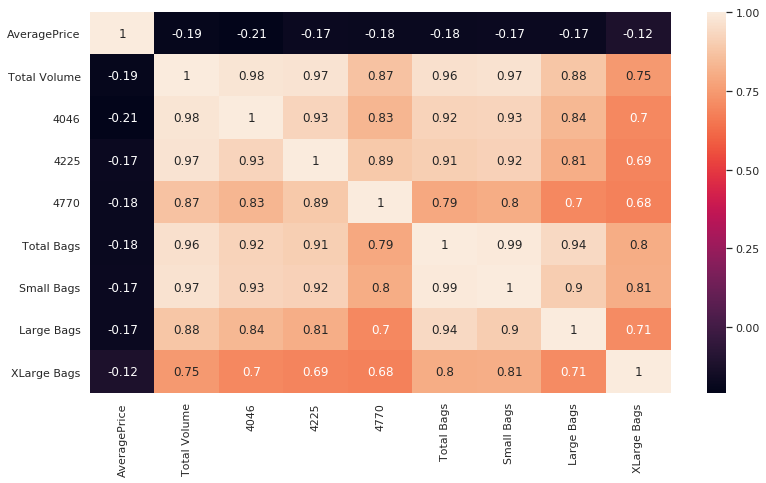

In [113]:
#Heatmap
plt.figure(figsize=(13,7))
sns.heatmap(df.corr(), annot=True)

### Feature Engineering

In [114]:
#Breaking down the date to year, month and day
df['year'] = df['Date'].apply(lambda row: row.year)
df['month'] = df['Date'].apply(lambda row: row.month)
df['day'] = df['Date'].apply(lambda row: row.day)

In [115]:
#Encoding the type feature
df = pd.get_dummies(df, columns=['type'])

In [116]:
#Drop columns that won't be used for machine learning
df = df.drop(['Date','region'], axis = 1)

In [117]:
#Feature engineered dataframe
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day,type_conventional,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,1,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,1,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,1,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,1,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,1,0


In [118]:
#Checking data types
df.dtypes

AveragePrice         float64
Total Volume         float64
4046                 float64
4225                 float64
4770                 float64
Total Bags           float64
Small Bags           float64
Large Bags           float64
XLarge Bags          float64
year                   int64
month                  int64
day                    int64
type_conventional      uint8
type_organic           uint8
dtype: object

### Build Model

In [149]:
#Correlation of the total volume feature
df.corr()['Total Volume'].sort_values(ascending = False)

Total Volume         1.000000
4046                 0.977863
4225                 0.974181
Small Bags           0.967238
Total Bags           0.963047
Large Bags           0.880640
4770                 0.872202
XLarge Bags          0.747157
type_conventional    0.232434
year                 0.017193
day                 -0.009747
month               -0.024689
AveragePrice        -0.192752
type_organic        -0.232434
Name: Total Volume, dtype: float64

In [150]:
#Independent variables
X = df[['4046','4225','Small Bags','Total Bags','Large Bags','4770','XLarge Bags','type_conventional','year']].values
X[0:5]

array([[1.0367400e+03, 5.4454850e+04, 8.6036200e+03, 8.6968700e+03,
        9.3250000e+01, 4.8160000e+01, 0.0000000e+00, 1.0000000e+00,
        2.0150000e+03],
       [6.7428000e+02, 4.4638810e+04, 9.4080700e+03, 9.5055600e+03,
        9.7490000e+01, 5.8330000e+01, 0.0000000e+00, 1.0000000e+00,
        2.0150000e+03],
       [7.9470000e+02, 1.0914967e+05, 8.0422100e+03, 8.1453500e+03,
        1.0314000e+02, 1.3050000e+02, 0.0000000e+00, 1.0000000e+00,
        2.0150000e+03],
       [1.1320000e+03, 7.1976410e+04, 5.6774000e+03, 5.8111600e+03,
        1.3376000e+02, 7.2580000e+01, 0.0000000e+00, 1.0000000e+00,
        2.0150000e+03],
       [9.4148000e+02, 4.3838390e+04, 5.9862600e+03, 6.1839500e+03,
        1.9769000e+02, 7.5780000e+01, 0.0000000e+00, 1.0000000e+00,
        2.0150000e+03]])

In [151]:
#Dependent features
y = df['Total Volume'].values
y[0:5]

array([ 64236.62,  54876.98, 118220.22,  78992.15,  51039.6 ])

In [152]:
#Split datframe into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14599, 9) (14599,)
(3650, 9) (3650,)


In [153]:
#Normalizing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [154]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [155]:
#Get the coef and intercept
print('Linear Regression coefficient (m)', regressor.coef_)
print('Linear Regression intercept (b)', regressor.intercept_)

Linear Regression coefficient (m) [ 1.25277070e+06  1.19312839e+06  1.09304121e+04  9.45856842e+05
  3.57613671e+03  1.04403099e+05  2.52726555e+02 -2.31471154e+00
  2.52319407e+00]
Linear Regression intercept (b) 835927.860298651


In [156]:
#Score training set
print(regressor.score(X_train, y_train))

0.9999999997484342


In [157]:
#Score test set
print(regressor.score(X_test, y_test))

0.9999999999637662


### Test Model

In [158]:
#Truth values
y_test[0:10]

array([   4400.25,  190716.43, 1045450.41,    9883.59,   16205.22,
         12366.01,   21533.64,    3886.64,   10375.29,  136964.3 ])

In [159]:
#Predicted values
y_pred = regressor.predict(X_test)
y_pred[0:10]

array([   4401.487203  ,  190712.97119772, 1045454.94533659,
          9890.19267056,   16214.67198433,   12372.57760705,
         21537.70584363,    3890.58158817,   10379.25920665,
        136962.19893083])

### Evaluate Model

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
#Print variance and RMSE
print('Variance: %s' % r2_score(y_test,y_pred)) #0 is worse, 1 is best
print('RMSE: %s' % mean_squared_error(y_test,y_pred)) # the lower the better
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Variance: 0.9999999999637662
RMSE: 485.9523281353436
Root Mean Squared Error: 22.04432643868584


### Visualize truth and predicted values

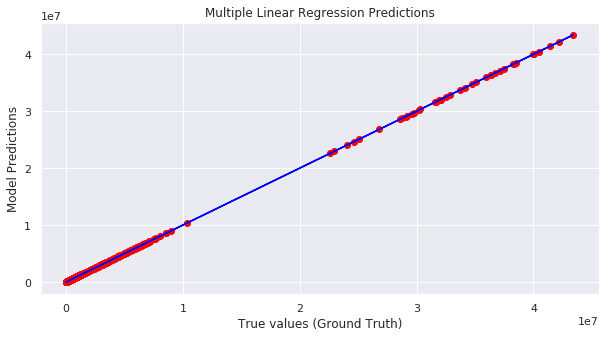

In [161]:
#Scatterplot of truth and predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, regressor.predict(X_test), color ='blue')
plt.ylabel('Model Predictions')
plt.xlabel('True values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')
plt.show()

### k-fold cross validation

In [162]:
#Cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
accuracies

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [163]:
#Mean of the validation
accuracies.mean()

0.9999999996638715

In [164]:
#Standard deviation of the validation
accuracies.std()

5.484279548074208e-10